<a href="https://colab.research.google.com/github/juninhoisrael/Breast-Cancer-Wisconsin-Diagnostic-/blob/main/Breast_Cancer_Wisconsin_(Diagnostic).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Usaremos o dataset: Breast Cancer Wisconsin (Diagnostic), disponibilizado pelo Scikit-learn. A variável alvo classifica como 1 o tumor maligno e 0 o Benigno. As demais variáveis são calculadas a partir de uma imagem digitalizada de uma massa mamária. Eles descrevem características dos núcleos celulares presentes na imagem.

In [2]:
#Carregando o Dataset
import pandas as pd
import sklearn
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
variaveis = pd.DataFrame(dataset.data, columns=dataset.feature_names)

target = pd.Series(dataset.target, name='diagnostico')

df = pd.concat([variaveis, target], axis=1)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnostico
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Olhando o diagnóstico contra as outras variáveis, tentamos descobrir quais nos trazem mais informação para diferenciar o "tumor maligno do benigno", isto é, em quais variáveis eu enxergo uma distribuição em que elas sejam mais distantes.

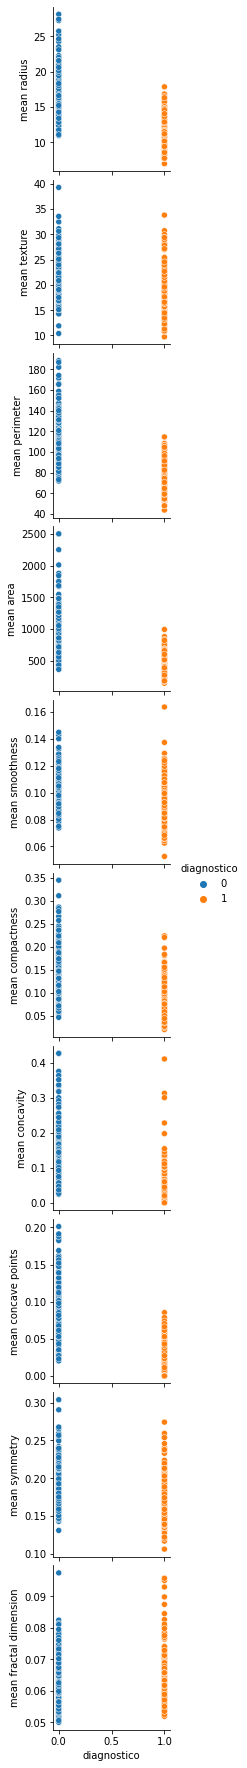

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.pairplot(df, x_vars=['diagnostico'], y_vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness',
              'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension'], hue='diagnostico')

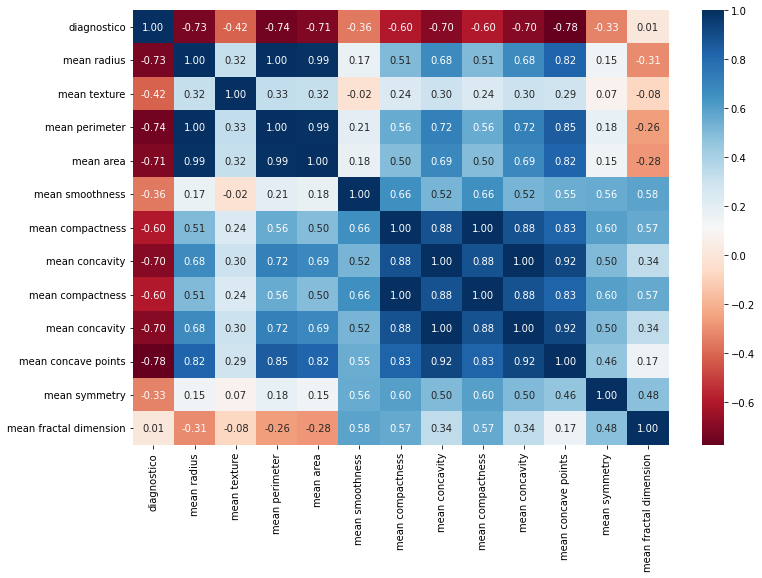

In [8]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))
sns.heatmap(
    df[['diagnostico', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity',
    'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']].corr(), #Fonte dos dados, nossa matriz de correlação
    annot=True, #Anotar os valores das correlações nas caixinhas coloridas
    fmt='.2f', # Formato float de 2 dígitos, para arredondar os números
    cmap='RdBu', # Mapa de cores do vermelho (menor) para o azul (maior)
  
           ) #Podemos ver que "mean radius", "mean perimeter" e "mean area" tem uma correlação quase próxima a 1. Então devemos optar pela inclusão de apenas uma delas na regressão.
plt.show()

In [19]:
from sklearn.model_selection import train_test_split #dividindo o dataset em Treino e Teste.

X_train, X_test, y_train, y_test = train_test_split(variaveis[['mean radius', 'mean texture', 'mean symmetry']], target, test_size=0.25, random_state=99)

In [11]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [20]:
lr = LogisticRegression().fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

In [13]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, recall_score, precision_score, plot_roc_curve

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


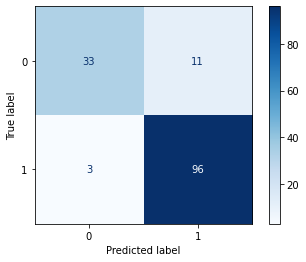

In [21]:
plot_confusion_matrix(lr, X_test, y_test, cmap='Blues')

Nessa tabela podemos ver que três casos de diagnóstico Maligno o modelo previu como Benigno e onze casos onde o diagnóstico real era Benigno e o modelo classificou incorretamente como Maligno.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


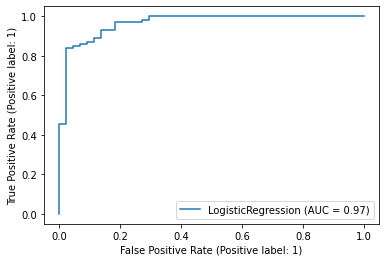

In [22]:
plot_roc_curve(lr, X_test, y_test)

In [25]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_lr)}\n\Precisão: {precision_score(y_test, y_pred_lr)}\n\
      Recall: {recall_score(y_test, y_pred_lr)}')

Acurácia: 0.9020979020979021
\Precisão: 0.897196261682243
      Recall: 0.9696969696969697


In [23]:

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


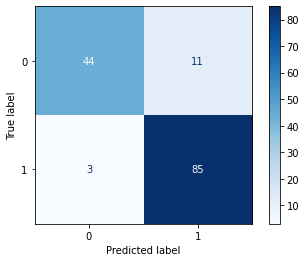

In [17]:
plot_confusion_matrix(nb, X_test, y_test, cmap='Blues')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


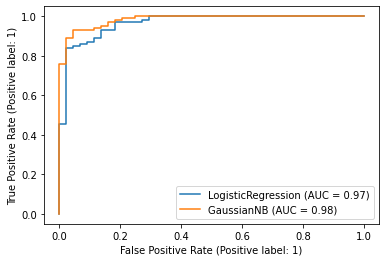

In [26]:
classifiers = [lr, nb]
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)

In [24]:
print(f'Acurácia: {accuracy_score(y_test, y_pred_nb)}\n\Precisão: {precision_score(y_test, y_pred_nb)}\n\
      Recall: {recall_score(y_test, y_pred_nb)}')

Acurácia: 0.916083916083916
\Precisão: 0.8990825688073395
      Recall: 0.98989898989899


Naive Bayes parece ter melhores métricas.